In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt





In [3]:
dados = pd.read_csv("dados/basegeral_seplag.csv",sep=';', low_memory = False)

 # Removendo colunas nao utilizadas

In [4]:
dadosFiltrados = dados.drop(columns=['dt_primeiros_sintomas','sintomas','comorbidades','cd_municipio'])

# Filtrando quantidades de testes no primeiro Trimestre de 2021

In [81]:
linhasTestes = (dadosFiltrados['dt_notificacao'] >= '2021-01-01') & (dadosFiltrados['dt_notificacao'] <= '2021-03-31')

testesTrimestre = dadosFiltrados[linhasTestes]

linhas = testesTrimestre['municipio'] == 'RECIFE'

teste = testesTrimestre[linhas]

teste

,dt_notificacao,Sexo,raca,municipio,hospitalizacao,classe,Resultado,evolucao,dt_obito,faixa_etaria,tipo
56230,2021-02-11,FEMININO,BRANCA,RECIFE,NaN,NEGATIVO,NEGATIVO,RECUPERADO,NaN,40-49 anos,leve
56232,2021-02-03,FEMININO,BRANCA,RECIFE,NaN,NEGATIVO,NaN,RECUPERADO,NaN,20-29 anos,leve
56233,2021-03-23,MASCULINO,BRANCA,RECIFE,NaN,CONFIRMADO,POSITIVO,RECUPERADO,NaN,0-9 anos,leve
56237,2021-01-18,FEMININO,BRANCA,RECIFE,NaN,NEGATIVO,NEGATIVO,NaN,NaN,20-29 anos,leve
56238,2021-01-06,MASCULINO,BRANCA,RECIFE,NaN,NEGATIVO,NEGATIVO,NaN,NaN,60-69 anos,leve
...,...,...,...,...,...,...,...,...,...,...,...
340218,2021-02-19,FEMININO,PRETA,RECIFE,NaN,NEGATIVO,NEGATIVO,RECUPERADO,NaN,70-79 anos,leve
340219,2021-01-26,MASCULINO,IGNORADO,RECIFE,NaN,CONFIRMADO,POSITIVO,RECUPERADO,NaN,60-69 anos,leve
340224,2021-01-27,MASCULINO,BRANCA,RECIFE,NaN,CONFIRMADO,NaN,RECUPERADO,NaN,50-59 anos,leve
340233,2021-01-14,FEMININO,IGNORADO,RECIFE,NaN,CONFIRMADO,POSITIVO,RECUPERADO,NaN,70-79 anos,leve


# Filtrando casos Confirmados no primeiro Trimestre de 2021

In [88]:
#Casos Confirmados
linhasConfirmados =  (testesTrimestre['classe'] == 'CONFIRMADO')

casosTrimestre = testesTrimestre[linhasConfirmados]



# Casos em Recife

In [125]:
#Casos não-confirmados

linhasTestes = (testesTrimestre['classe'] != 'CONFIRMADO') & (testesTrimestre['municipio'] == 'RECIFE')

testesNegativos = testesTrimestre[linhasTestes]

casosRecife = (casosTrimestre['municipio'] == 'RECIFE')



resultadoNegativo = ((testesNegativos.shape[0] * 100)/(testesNegativos.shape[0]+casosRecife.shape[0]))
print('testes realizados com resultado negativo : {:.2f} '.format(resultadoNegativo) + '%')

resultadoPositivo = ((casosRecife.shape[0] * 100)/(testesNegativos.shape[0]+casosRecife.shape[0]))
print('testes realizados com resultado positivo : {:.2f} '.format(resultadoPositivo) + '%')





#= casosTrimestre[casosRecife]
#testesNegativos.shape[0]
#casosRecife.groupby('faixa_etaria').size()

testes realizados com resultado negativo : 60.65 %
testes realizados com resultado positivo : 39.35 %


 # Filtrando casos por Municipio

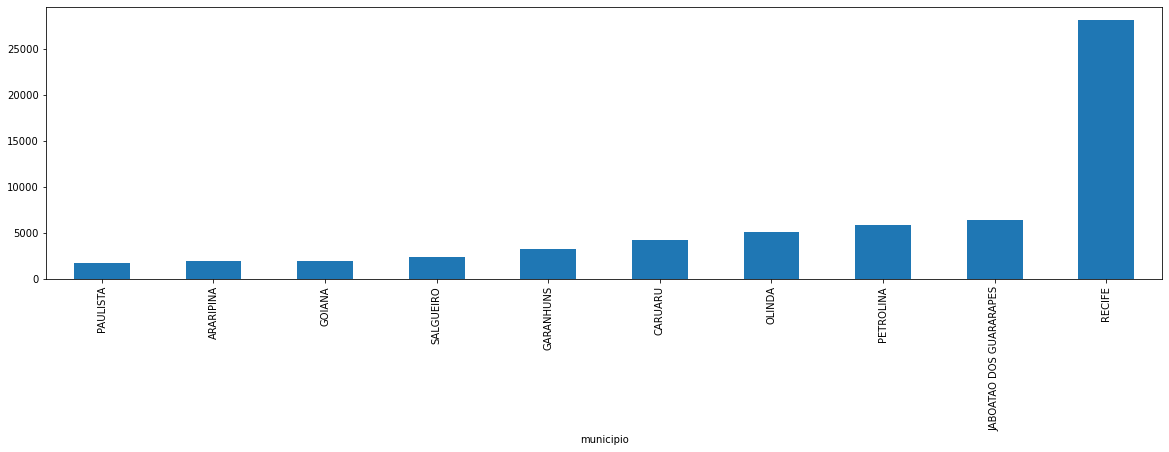

In [68]:
casos_municipio = dados_filtrados.groupby('municipio').size()

casos_municipio.sort_values()[-10:].plot(kind='bar',figsize=(20,5))


# Filtrando casos de obito por municipio

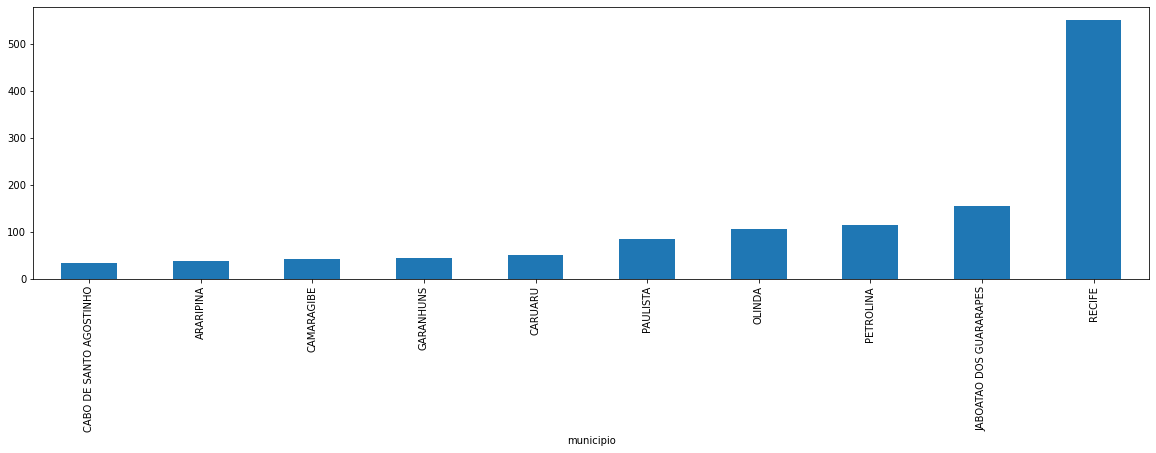

In [82]:
casos_obito = dados_filtrados[dados_filtrados['dt_obito'].notna()]

casos_obito_municipio = casos_obito.groupby('municipio').size()

casos_obito_municipio

casos_obito_municipio.sort_values()[-10:].plot(kind='bar',figsize=(20,5))

# Filtrando casos por faixa etaria

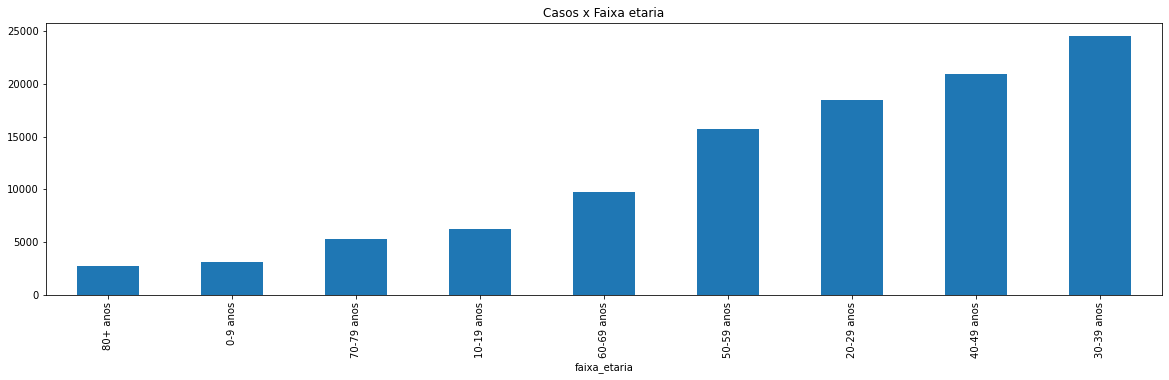

In [131]:
porcentagem_casos = dados_filtrados.groupby('faixa_etaria').size()

plt.title('Casos x Faixa etaria')

porcentagem_casos.sort_values()[-10:].plot(kind='bar',figsize=(20,5))


# casos de obito por faixa etaria

faixa_etaria
0-9 anos        3
10-19 anos      4
20-29 anos     19
30-39 anos     68
40-49 anos    154
50-59 anos    281
60-69 anos    442
70-79 anos    557
80+ anos      520
dtype: int64

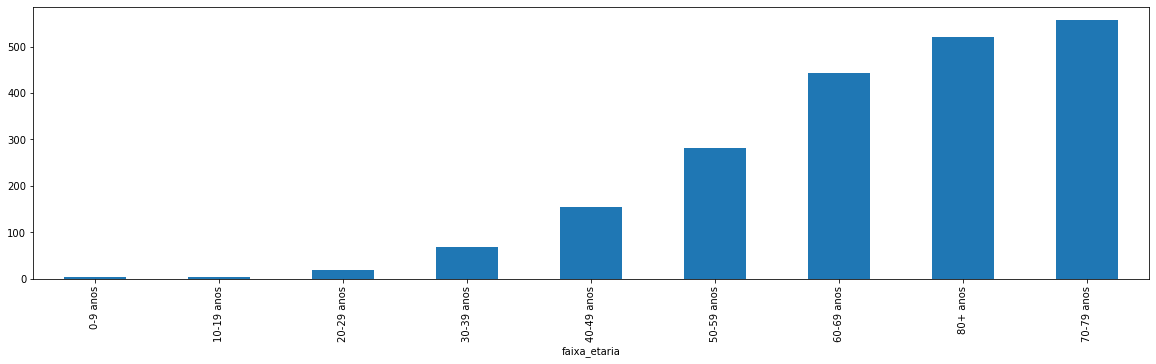

In [83]:
obitosFaixaEtaria = casos_obito.groupby('faixa_etaria').size()

obitosFaixaEtaria.sort_values()[-10:].plot(kind='bar',figsize=(20,5))

obitosFaixaEtaria

# Taxa de letalidade por idade

A taxa de letalidade por faixa etaria é: faixa_etaria
0-9 anos       0.097150
10-19 anos     0.063888
20-29 anos     0.102786
30-39 anos     0.277257
40-49 anos     0.736877
50-59 anos     1.783674
60-69 anos     4.517580
70-79 anos    10.475832
80+ anos      18.847408
dtype: float64%


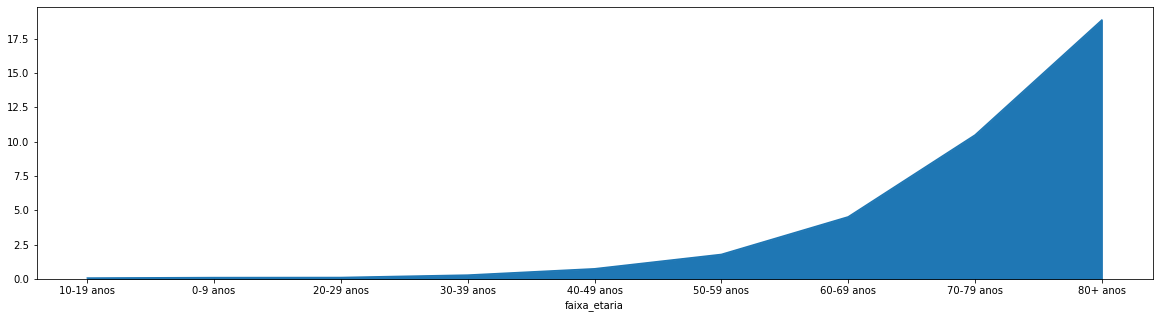

In [129]:
resultado = (obitosFaixaEtaria/porcentagem_casos) * 100 

print(f'A taxa de letalidade por faixa etaria é: {resultado}%'.format())

resultado.sort_values()[-10:].plot(kind='area',figsize=(20,5))
